In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

We will be using a dataset on wildfires in Brazil from 1998 to 2017. 

With this dataset, we will find patterns in the time of year and state related to the number of wildfires. The columns represent the year the forest fire happened, the Brazilian state, the month the forest fire happened, the number of forest fires reported, and the date they were reported. 

In [4]:
fire = pd.read_csv('amazon.csv',encoding='latin1')
fire.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
fire.tail(3)

,year,state,month,number,date
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


The questions we’ll ask for this use case:

What Are the Predicted Number of Wildfires in Brazil in 2020?
What Month Will be the Worst for Wildfires in Brazil?
What States Have the Highest Number of Wildfires?
Has the Average Number of Wildfires Increased in Brazil Year-Over-Year?

In [14]:
fire.shape

(6454, 5)

In [15]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [16]:
#converting the date to datetime 
fire['date'] = pd.to_datetime(fire['date'])

In [17]:
#checking for null values
fire.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [18]:
#check for duplicates
fire[fire.duplicated()].shape[0]

32

In [19]:
#drop the duplicates row
fire.drop_duplicates(inplace=True)

In [21]:
#mapping month to English names
fire['month'] = fire['month'].map({'Agosto':'August', 'Outubro':'October', 'Novembro':'November', 'Setembro':'September','Junho':'June', 'Julho':'July', 'Janeiro':'January', 'Fevereiro':'February','Abril':'April','Março':'March','Maio':'May','Dezembro':'December'})

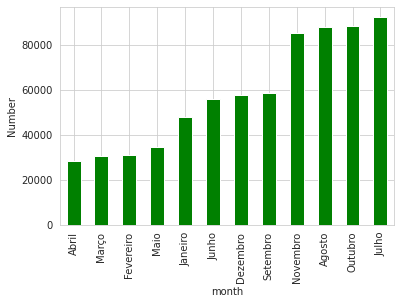

In [7]:
#looking at fires by month
fire.groupby('month').number.sum().sort_values().plot.bar(color='g')
plt.ylabel('Number')
plt.show()


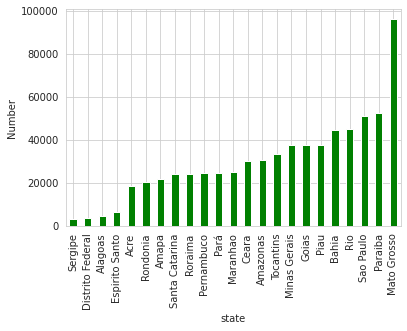

In [8]:
#What States Have the Highest Number of Wildfires?
fire.groupby('state').number.sum().sort_values().plot.bar(color='g')
plt.ylabel('Number')
plt.show()

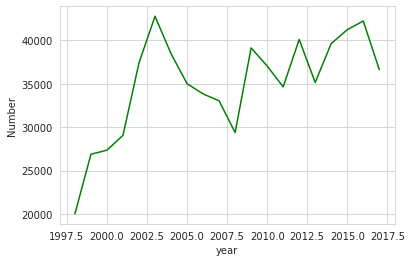

In [28]:
temp=fire.groupby('year').number.sum()
sns.lineplot(temp.index,temp.values,color='g')
plt.ylabel('Number')
plt.show()

In [30]:
import plotly.express as px
fig = px.pie(values=fire['state'].value_counts().values, names=fire['state'].value_counts().index,title='Cities involving forest fires')
fig.show()

In [52]:
#No of fires per state and by year
temp=fire.groupby('year')[['number','state']]


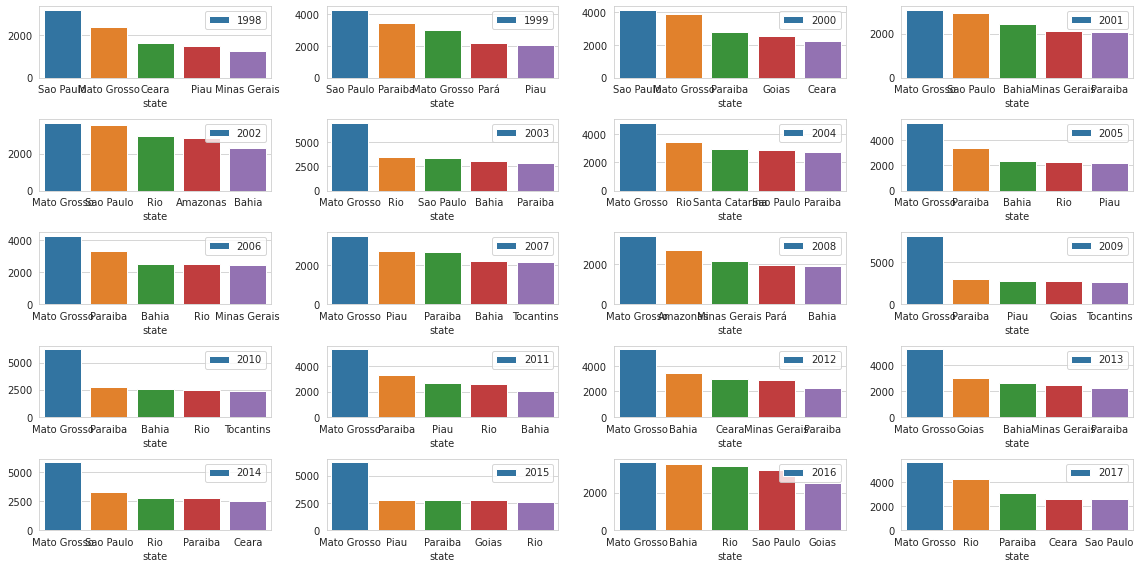

In [89]:
#Top 5 states each year
f = plt.figure(figsize=(16,8))
i=0
for k, gp in temp:
             f.add_subplot(5, 4, i+1)
             #print('key=' + str(k))
             inner_temp = gp.groupby('state')['number'].sum().sort_values(ascending=False).head(5)
             sns.barplot(inner_temp.index,inner_temp.values,label=k)
             plt.legend()
             i+=1
plt.tight_layout()
plt.show()